<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep_8-9/LRSKLearn_Keras_Mis_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [23]:
NASA = np.loadtxt('/content/drive/MyDrive/Machine_Learning/temperatura global.txt')
X = NASA[:,1:] #selecciono las dos columnas de temperaturas (columna 2 y 3) y defino como x
Y = NASA[:,1] #selecciona la primera columna de los años y defino como y
Y.shape

(143,)

Text(0.5, 0.98, 'Distribución de los datos')

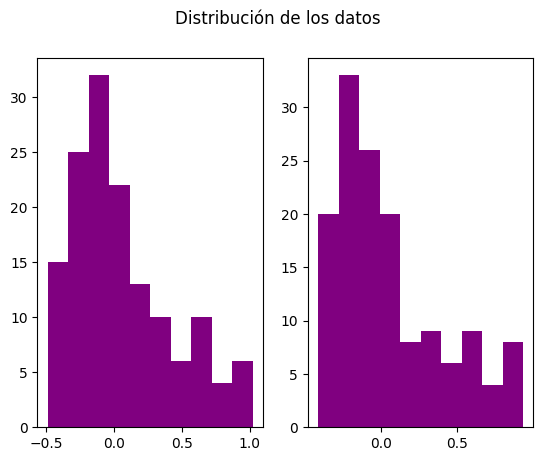

In [21]:
fig, ax = plt.subplots(1,2)
for i in range(len(ax)):
  ax[i].hist(X[:,i], color = 'purple')
fig.suptitle('Distribución de los datos')  #los datos están centrados en cero por su naturaleza de variación de temperatura

In [24]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(X, Y)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 11, number of weight updates: 1574.0


In [26]:
w0 = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:                   w: {w0}, b:{w}")

model parameters:                   w: [0.00162632], b:[0.52973432 0.4687199 ]


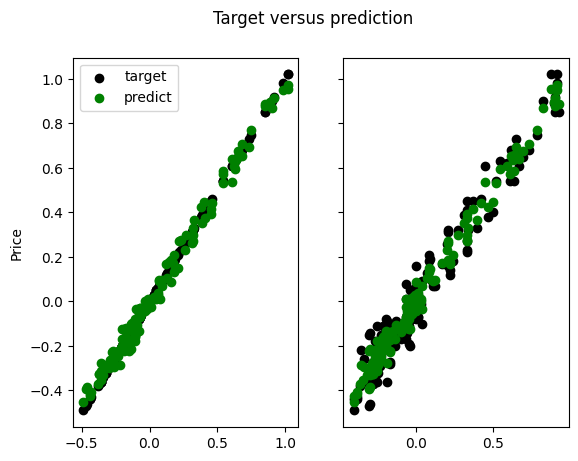

In [29]:
#predict target using normalized features
yp = w0[0]
for i in range(len(w)):
  yp+=w[i]*X[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,2,sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],Y, label = 'target', color = 'black')
    ax[i].scatter(X[:,i],yp,color="green", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target versus prediction")
plt.show()

In [32]:
#USING LIBRARIES
#Split in Train and Test samples.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [33]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 12, number of weight updates: 1201.0


In [34]:
w0 = sgdr.intercept_
w = sgdr.coef_
print(f"model parameters:                   w: {w0}, b:{w}")

model parameters:                   w: [-0.00025615], b:[0.51586933 0.46776477]


In [35]:
#Test score
sgdr.score(X_test,y_test)

0.9833282822253144

In [41]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [43]:
input_dim = 1
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 503ms/step - loss: 0.0731
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0709
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0688
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0669
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0650
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0631
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0614
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0597
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0580
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0549
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0534
Epoch 13/100
1/1 [==============================] - 0s

In [45]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[0.39356846]
 [0.14980437]] [0.00568724]


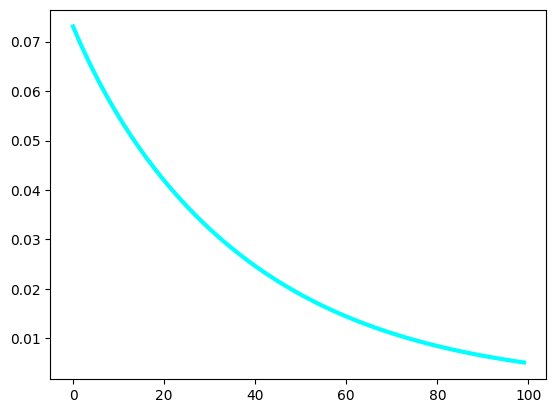

In [47]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'cyan', linewidth= '3');

In [48]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0050
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0049
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0038
Epoch 13/100
1/1 [==============================] - 0s

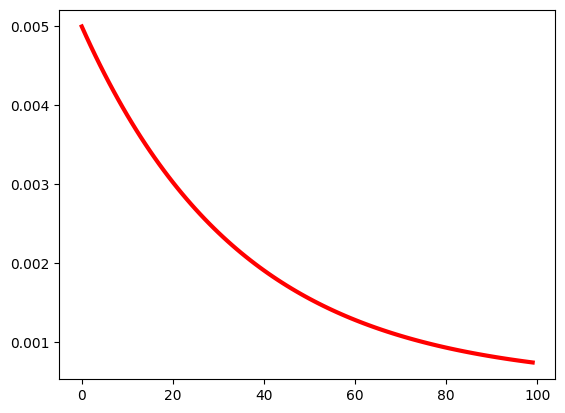

In [50]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'red', linewidth = '3');

In [51]:
score = model.evaluate(X_test, y_test, verbose=0)
score

0.0008324063383042812